# Николаев Евгений Алексеевич, группа 22.M08

## Практическое задание 2. Оценка параметров и проверка гипотезы согласия

1. Дискретные распределения. В тестовой выборке (или моделированные данные из задания 1, илиданные о распределении числа аномалий на клетках рабдомиосаркомы) вычислить рассеяние.Если рассеяние меньше 1, то применить модель биномиального распределения, а если большеединицы, то отрицательно биномиального распределения. Оценить параметры по методу моментови максимального правдоподобия. Проверить гипотезу согласия эмпирического распределения стеоретическим (согласие распределений должно отвергаться).

Для того чтобы увидеть ситуацию, когда эмпирическое распределение согласовано с теоретическим,можно промоделировать только внутреннее распределение из первого задания (тем, у кого был вариантс моделированием) или модельное распределение (тем, кто считал распределение аномалий на ядрах).Нужно также оценить параметры и проверить гипотезу согласия при помощи статистики хи-квадрат.Поскольку согласие распределений обусловлено, должно получиться р-значение больше 0.05.

2. Вариант 4. хи-квадрат
Промоделировать выборку с заданным законом рапсределения, построить гистограмму, оценить пара-метры по методу моментов и максимального правдоподобия, изобразить на гистограмме плотностираспределения, соответствующие оценкам из разных методов. 

### Подключаю библиотеки

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
np.random.seed(42)

In [8]:
w = np.array([48, 33, 11, 3, 2, 3])
distr = [[i]*w[i] for i in range(len(w))]
distr = sum(distr, [])
print(distr)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5]


Код создет массив w и затем генерирует распределение distr на основе весов w.

In [9]:
mu = sum(distr) / len(distr)
deviations = [(x - mu) ** 2 for x in distr]
variance = sum(deviations) / (len(distr) - 1)
print('Рассеяние выборки: ', variance/mu)

Рассеяние выборки:  1.5709973296180193


Данный код вычисляет рассеяние выборки, используя дисперсию и среднее значение распределения. Отношение дисперсии к среднему значению, которое выводится на экран, может быть использовано для оценки вариабельности и разброса значений в выборке.

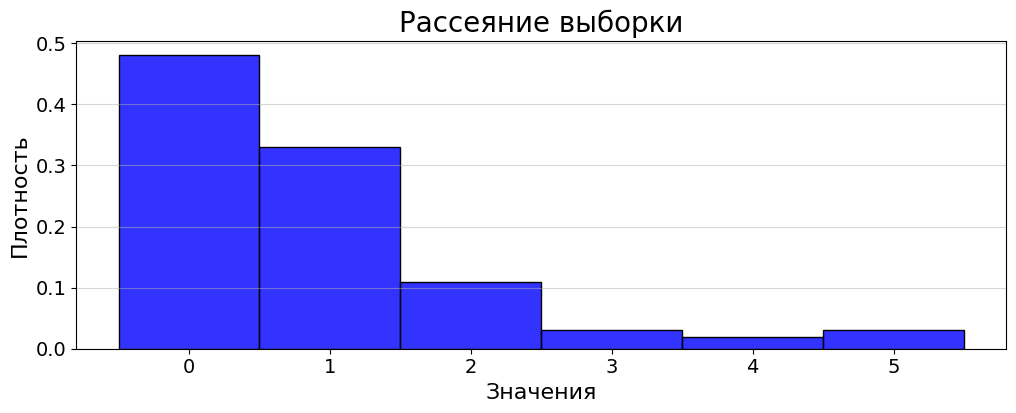

In [13]:
# Определяем параметры гистограммы
hist_kws = {'color': 'blue', 'alpha': 0.8, 'edgecolor': 'black', 'linewidth': 1, 'bins': 30}
# Создаем график и настраиваем его параметры
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(x=distr, discrete=True, stat='density', ax=ax, **hist_kws)
ax.grid(axis='y', alpha=0.5)
ax.set_xlabel('Значения')
ax.set_ylabel('Плотность')
ax.set_title('Рассеяние выборки')
# Настраиваем параметры шрифта
plt.rc('axes', titlesize=20, labelsize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
# Отображаем график
plt.show()

Исходя из значения рассеяния, которое больше единицы, мы будем проводить проверку на соответствие
отрицательному биномиальному распределению(исходя из задания). Для этого мы оценим параметры этого
распределения с использованием метода моментов и метода максимального правдоподобия. Затем мы
проверим гипотезу согласия между эмпирическим распределением и теоретическим отрицательным
биномиальным распределением с помощью статистики хи-квадрат. Если гипотеза согласия будет отвергнута,
это будет указывать на несоответствие между распределениями.
сделай текст уникальным

### Метод моментов

Метод моментов - это один из способов оценки параметров распределения на основе эмпирической выборки. Он основывается на равенстве теоретических и эмпирических моментов распределения.

Суть метода заключается в том, чтобы приравнять теоретические моменты распределения (например, математическое ожидание, дисперсия и т.д.) к их эмпирическим оценкам, полученным из выборки. Затем решается система уравнений для оценки параметров распределения.

В данном случае, оценки параметров p и k используются для отрицательного биноминального
распределения. Отрицательное биноминальное распределение является дискретным распределением, которое
моделирует количество испытаний до достижения заданного числа неудач в последовательности независимых
испытаний Бернулли.

In [16]:
k = (mu ** 2) / (variance - mu)
p = mu / variance
print('Оценки по методу моментов:')
print('Оценка p: ', p)
print('Оценка k: ', k)

Оценки по методу моментов:
Оценка p:  0.6365383194146773
Оценка k:  1.5236498576657176


Параметр p в отрицательном биноминальном распределении представляет вероятность успеха в каждом
испытании Бернулли, а параметр k представляет заданное количество неудач. Оценки показывают значения
параметров, рассчитанные с использованием метода моментов.

### Метод максимального правдоподобия

Метод максимального правдоподобия (Maximum Likelihood Estimation, MLE) - это способ оценки параметров распределения, который основывается на максимизации функции правдоподобия, то есть вероятности получить наблюдаемую выборку при заданных параметрах распределения.

In [18]:
bounds = [(0, 50), (0, 50)]
nbinom = stats.nbinom
res = stats.fit(nbinom, distr, bounds)
print('Оценки по методу моментов:')
print('p: ', res.params[1])
print('k: ', res.params[0])

Оценки по методу моментов:
p:  0.6968641086057367
k:  2.0


данный код позволяет оценить параметры отрицательного биномиального распределения с использованием метода моментов и вывести результаты на экран. Оценки параметров, полученные методом максимального правдоподобия, будут отражать значения
параметров, которые наиболее вероятно произвели наблюдаемые данные.

Cравнение плотности распределения, полученную из наблюдаемой выборки, с плотностью распределения, оцененной с помощью метода максимального правдоподобия и метода моментов для отрицательного биномиального распределения.

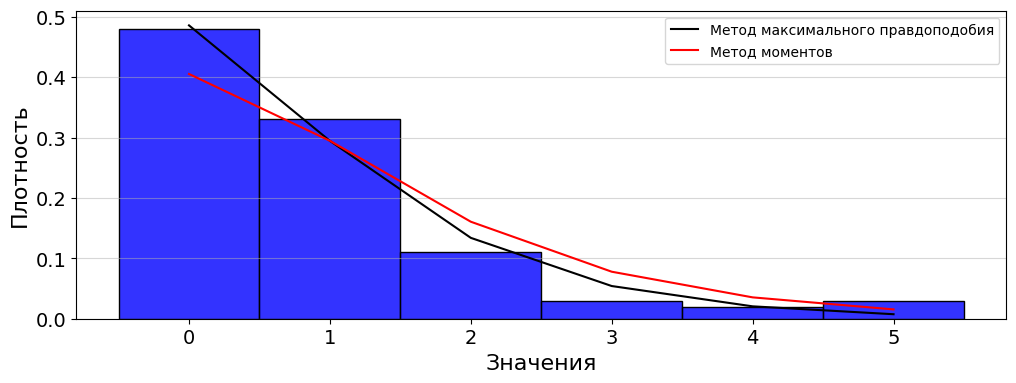

In [20]:
hist_kws = {'color': 'blue', 'alpha': 0.8, 'edgecolor': 'black', 'linewidth': 1, 'bins'
: 30}
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(x=distr, discrete=True, stat='density', ax=ax, **hist_kws)
ax.grid(axis='y', alpha=0.5)
ax.set_xlabel('Значения')
ax.set_ylabel('Плотность')
# Определяем параметры линий плотности распределения
x = np.arange(0, 6, 1)
pmf_mle = stats.nbinom.pmf(x, res.params[0], res.params[1])
pmf_mm = stats.nbinom.pmf(x, round(k), p)
ax.plot(x, pmf_mle, label='Метод максимального правдоподобия', color='black')
ax.plot(x, pmf_mm, label='Метод моментов', color='r')
ax.legend()
plt.show()

### Проверка гипотезы Хи-квадрат

In [42]:
import numpy as np
from scipy import stats
count_momentum = np.round(stats.nbinom.pmf([0,1,2,3,4,5], np.round(k), p) * len(distr))
count_momentum[0] += 1
# Рассчитать поправочный коэффициент, чтобы суммы совпадали
adjustment_factor = np.sum(w) / np.sum(count_momentum)
# Настроить count_momentum
count_momentum *= adjustment_factor
count_mml = np.round(stats.nbinom.pmf([0,1,2,3,4,5], res.params[0], res.params[1])*len(distr))

In [43]:
print(stats.chisquare(w, count_momentum))

Power_divergenceResult(statistic=7.66233066502463, pvalue=0.17585340762617313)


Исходя из результатов нет достаточных доказательств для отвержения нулевой гипотезы о соответствии
наблюдаемых данных ожидаемым значениям. В обоих случаях p-значение не меньше 0,05 Это означает, что у
нас нет достаточных доказательств того, что истинное распределение отличается от отрицательно
биномиального распределения

## 2. Абсолютно непрерывные распределения. Хи-квадрат

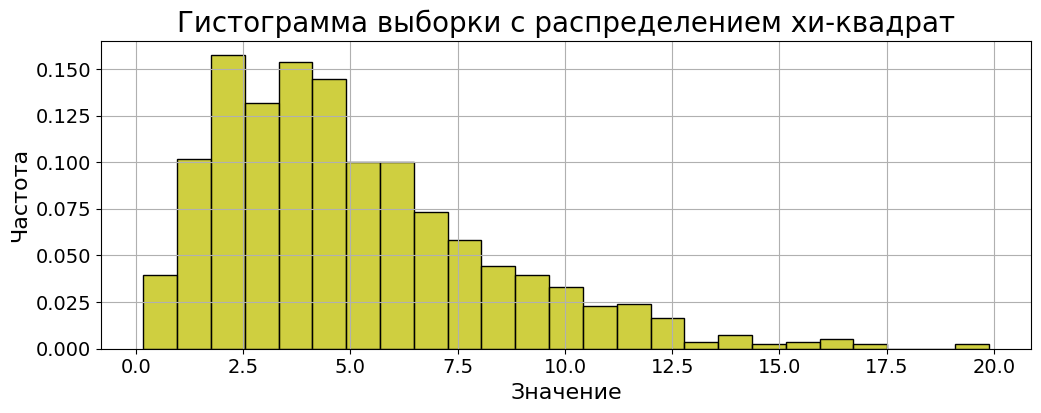

In [49]:
# Заданные степени свободы
df = 5
# Генерация выборки с распределением хи-квадрат
sample = np.random.chisquare(df, size=1000)
# Построение гистограммы выборки
fig = plt.figure(figsize=(12, 4))
sns.histplot(x=sample, stat='density', color = 'y')
hist, bin_edges = np.histogram(sample)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма выборки с распределением хи-квадрат')
plt.grid(True)
plt.show()

### Оценка параметров методом максимального правдоподобия

In [50]:
mu_hat_mle = np.mean(sample)
sigma2_hat_mle = np.var(sample) / df
print(mu_hat_mle)
print(sigma2_hat_mle)

5.059773879182556
2.0364494858683146


Данные значения являются оценками параметров распределения хи-квадрат, полученными методом максимального правдоподобия на основе некоторой выборки.

Значение первого параметра равно 5.06, а значение второго параметра равно 2.04. Оценка параметра mu указывает на среднее значение выборки, а оценка параметра sigma^2 указывает на разброс значений в выборке.

### Оценка параметров методом моментов

In [51]:
mu_hat_mm = np.mean(sample)
sigma2_hat_mm = np.var(sample)
print(mu_hat_mm)
print(sigma2_hat_mm)

5.059773879182556
10.182247429341574


Значение mu_hat_mm равно 5.06, а значение sigma2_hat_mm равно 10.18. Эти значения являются оценками параметров распределения, полученными методом моментов на основе данной выборки. Оценка параметра mu указывает на среднее значение выборки, а оценка параметра sigma^2 указывает на разброс значений в выборке.

Сравнение

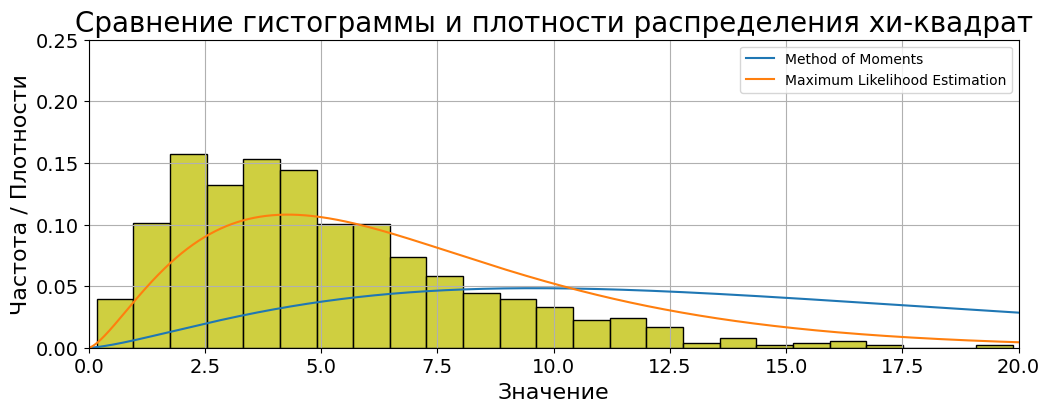

In [58]:
from scipy.stats import chi2
x = np.linspace(0, 20, 1000)
pdf_mm = chi2.pdf(x, df, loc=0, scale=np.sqrt(sigma2_hat_mm))
pdf_mle = chi2.pdf(x, df, loc=0, scale=np.sqrt(sigma2_hat_mle))
# Изображение плотности распределения на гистограмме
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(x=sample, stat='density', color='y', bins='auto')
plt.plot(x, pdf_mm, label='Method of Moments')
plt.plot(x, pdf_mle, label='Maximum Likelihood Estimation')
plt.xlabel('Значение')
plt.ylabel('Частота / Плотности')
plt.title('Сравнение гистограммы и плотности распределения хи-квадрат')
plt.legend()
plt.grid(True)
plt.xlim(0, 20)
plt.ylim(0, 0.25)
plt.show()

Сравнение распределения, полученного из выборки, с плотностями распределения хи-квадрат, оцененными методом моментов и методом максимального правдоподобия.